<a href="https://colab.research.google.com/github/melinadwisafitri/mental-care/blob/machine-learning/Chatbot_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 5.5 MB/s 


In [ ]:
#import library yang dibutuhkan
import urllib.request
import json
import numpy as np

import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#mengambil data dari github
data_url = 'https://raw.githubusercontent.com/melinadwisafitri/mental-care/machine-learning/dataset/data.json'
urllib.request.urlretrieve(data_url, 'data.json')

('data.json', <http.client.HTTPMessage at 0x7fc2540ca6d0>)

In [ ]:
#meload data json
with open('data.json', 'r') as f:
  data = json.load(f)

## Preprocessing Data

In [ ]:
#membuat list kosong
kata = []
kelas = []
dokumen = []

punct = ['!', '?', ',', '.']
stop = stopwords.words('indonesian')

for data in data['mental_healths']:
  for question in data['question']:
    #merubah semua huruf menjadi huruf kecil semua
    word = question.lower()  
    #menghapus tanda baca  
    word = word.translate(str.maketrans("","",string.punctuation))
    #tokenisasi  
    word = word_tokenize(word)
    #menghapus stopword atau kata-kata yang tidak penting  
    if word in stop:  
      continue
    #manambahkan data pada list kata dengan word
    kata.extend(word)     
    #menambagkan data pada list dokument dengan word dan tag
    dokumen.append((word, data['tag']))
    #menambahkan data pada list kelas dengan tag
    if data['tag'] not in kelas:
      kelas.append(data['tag'])
     

In [ ]:
print(dokumen)
print(kata)
print(kelas)

[(['hai'], 'salam_pembuka'), (['hallo'], 'salam_pembuka'), (['apa', 'kabar'], 'apa kabar'), (['bagaimana', 'kabarmu'], 'apa kabar'), (['apakah', 'kamu', 'baikbaik', 'saja'], 'apa kabar'), (['terimakasih'], 'salam_penutup'), (['sampai', 'ketemu', 'lagi'], 'salam_penutup'), ([], 'tidak_ada_di_pertanyaan'), (['apa', 'itu', 'kesehatan', 'mental'], 'pengertian_mental_health'), (['kesehatan', 'mental'], 'pengertian_mental_health'), (['apa', 'yang', 'dimaksud', 'dengan', 'kesehatan', 'mental'], 'pengertian_mental_health'), (['kesehatan', 'mental', 'adalah'], 'pengertian_mental_health'), (['apa', 'saja', 'jenisjenis', 'gangguan', 'mental'], 'jenis_mental_health'), (['jenisjenis', 'gangguan', 'mental'], 'jenis_mental_health'), (['apa', 'saja', 'macammacam', 'gangguan', 'mental'], 'jenis_mental_health'), (['macammacam', 'gangguan', 'mental'], 'jenis_mental_health'), (['apa', 'saja', 'gejalagejala', 'gangguan', 'mental'], 'gejala_gangguan_mental'), (['gejala', 'gangguan', 'mental'], 'gejala_gangg

In [ ]:
import pickle

#stemming menggunakan sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

kata = [stemmer.stem(w.lower()) for w in kata if w not in punct]
kata = sorted(list(set(kata)))
kelas = sorted(list(set(kelas)))
print (len(dokumen), "dokumen")
print (len(kelas), "kelas", kelas)
print (len(kata), "unique stemming words", kata)
pickle.dump(kata,open('kata.pkl','wb')) 
pickle.dump(kelas,open('kelas.pkl','wb'))

121 dokumen
45 kelas ['apa kabar', 'bipolar', 'ciri_kesehatan_mental', 'curhat', 'diagnosa_bipolar', 'emosi', 'faktor_lingkungan', 'faktor_mental_health', 'faktor_resiko_gangguan_mental', 'gangguan_bipolar', 'gangguan_jiwa', 'gangguan_jiwa_berat', 'gejala_bipolar', 'gejala_gangguan_mental', 'hukum_kesehatan_jiwa', 'jenis_mental_health', 'kesadaran_diri', 'kesadaran_masyarakat', 'keyakinan_diri', 'komunikasi', 'manfaat_cerita', 'mengatasi_nervous', 'mengobati_gangguan_jiwa', 'menjaga_diri', 'menjaga_kesehatan_mental', 'mental_breakdown', 'meyakinkan_diri', 'penanganan_bipolar', 'pencegahan', 'pengertian_mental_health', 'pentingnya_kesehatan_mental', 'penyebab_bipolar', 'penyebab_gangguan_mental', 'peran_keluarga_gangguan_bipolar', 'percaya_diri', 'pertolongan_pertama', 'sabar', 'salam_pembuka', 'salam_penutup', 'sedih', 'skizofrenia', 'solusi_kesehatan_mental', 'sosial_media', 'tidak_ada_di_pertanyaan', 'tipe_bipolar']
137 unique stemming words ['ada', 'adalah', 'agar', 'apa', 'apakah',

## Modeling

### Train test split

In [ ]:
import random
import numpy as np

#inisialisasi list kosong untuk data train
data_train = []
output_empty = [0] * len(kelas)
for doc in dokumen:
  #inisialisasi bag of word
    bow = []
    #mendeklarasikan list dokumen yang telah di tokenisasi
    list_kata = doc[0]
    #mengubah kata pada list_kata menjadi kata dasar (stemming)
    list_kata = [stemmer.stem(word.lower()) for word in list_kata]
    for w in kata:
        bow.append(1) if w in list_kata else bow.append(0)
    output_row = list(output_empty)
    output_row[kelas.index(doc[1])] = 1

    data_train.append([bow, output_row])
    
random.shuffle(data_train)
data_train = np.array(data_train)
x_train = list(data_train[:,0])
y_train = list(data_train[:,1])

#Membagi data latih dan data test
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### fit model 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf

model = Sequential() 
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), epochs=200, batch_size=5, verbose=1) 

Epoch 1/200
20/20 [==============================] - 1s 11ms/step - loss: 3.8115 - accuracy: 0.0208 - val_loss: 3.7920 - val_accuracy: 0.0000e+00
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 3.7586 - accuracy: 0.0729 - val_loss: 3.7912 - val_accuracy: 0.0000e+00
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 3.7170 - accuracy: 0.0938 - val_loss: 3.7849 - val_accuracy: 0.0000e+00
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 3.6375 - accuracy: 0.1458 - val_loss: 3.7817 - val_accuracy: 0.0400
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 3.5280 - accuracy: 0.1875 - val_loss: 3.7680 - val_accuracy: 0.0400
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 3.3926 - accuracy: 0.2188 - val_loss: 3.7486 - val_accuracy: 0.0400
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 3.2435 - accuracy: 0.1771 - val_loss: 3.7793 - val_accuracy: 0.0000e

## Evaluation

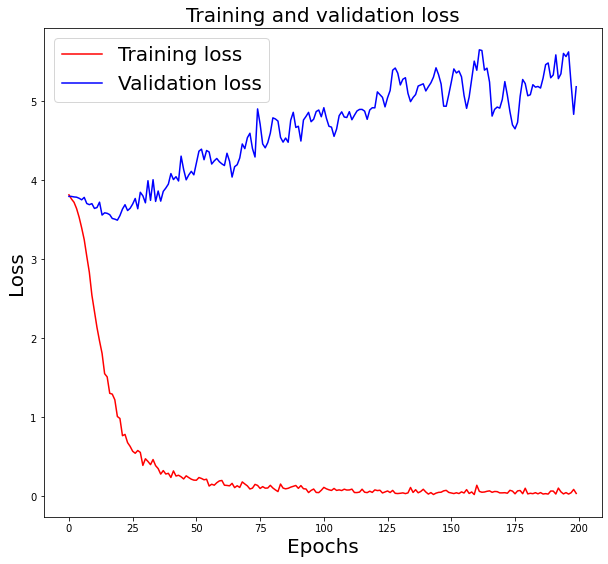

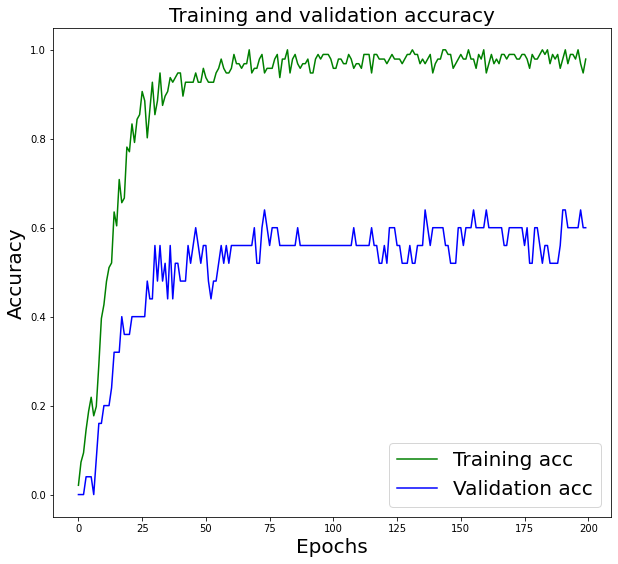

In [ ]:
import matplotlib.pyplot as plt

history_dict = hist.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = hist.epoch

plt.figure(figsize=(10,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(10,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20) 
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.show()

## Model h5

In [ ]:
model = model.save("chatbot.h5")